<a href="https://colab.research.google.com/github/DavidScanu/oc-projet-02-smartcity/blob/main/oc_projet_02_smartcity_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳🗼 Projet 2 - Participez à un concours sur la Smart City

Etudiant : *David Scanu* - [Parcours "AI Engineer"](https://openclassrooms.com/fr/paths/795-ai-engineer)

## 📝 Mission et contexte

- Expert indépendant spécialisé en intelligence artificielle
- Réaliser une **analyse exploratoire** avec un jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.
- Vos résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville.

## 💾 Jeux de données

[Jeu de données des arbres de la ville de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.83936,2.2455&basemap=jawg.streets)

## 📦 Livrables

- [Présentation Google Slide](https://docs.google.com/presentation/d/1TzNcTbaOVCX6HhP3kOHH32u8N_h_OE4TKmEYd-nQ1Dk/edit?usp=sharing)
- [Notebook Colab](https://colab.research.google.com/drive/1tmBcztJbx7387scT6f4ylLVcVgoWL1mJ?usp=sharing)
- [Dépôt GitHub](https://github.com/DavidScanu/oc-projet-02-smartcity)

## ⚙️ Installation des bibliothèques nécessaires

In [1]:
!pip install plotly==5.24.0 --no-cache-dir --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 58.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

## 👀 Visualisation générale du jeu de données

In [4]:
data_url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv"
data_filepath = "/content/drive/MyDrive/openclassrooms/projets/P02-participez-a-un-concours-sur-la-smart-city-scanu-david/data/p2-arbres-fr.csv"

In [5]:
data = pd.read_csv(data_url, delimiter=";")

In [6]:
data.shape
print(f"Le DataFrame de notre jeu de données contient : \n - {data.shape[0]} lignes \n - {data.shape[1]} colonnes.")

Le DataFrame de notre jeu de données contient : 
 - 200137 lignes 
 - 18 colonnes.


In [8]:
# Visualisation d'un échantillon des données
data.head(10)

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
5     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0036   
6     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0035   
7     NaN  SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...             35   
8     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802008   
9     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802009   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   
5     Arbre à miel  Tetradium      daniellii     NaN                38   
6     Arbre à miel  Tetradium      daniellii     NaN                37   
7          Platane   Platanus    x hispanica     NaN               260   
8          Sophora    Sophora       japonica     NaN               145   
9          Sophora    Sophora       japonica     NaN               135   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289  
5          0                 NaN          NaN       48.890470        2.315228  
6          0                 NaN          NaN       48.890504        2.315168  
7         17                 NaN          NaN       48.876722        2.280222  
8         14                   A          0.0       48.871990        2.275814  
9         10                   A          0.0       48.872046        2.275752

## Type de données

- Nature des variables :
  - quantitatives (discrètes, continues)
  - qualitatives (nomiales, oridnales)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

### Variables qualitatives

- id
- type_emplacement
- domanialite
- arrondissement
- complement_addresse
- numéro
- lieu
- id_emplacement
- libelle_francais
- genre
- espece
- variete
- stade_developpement
- remarquable (bool)

Bien qu'elles soient des **valeurs numériques**, les variables suivantes sont qualitatives :

- La variable `id` est une variable **qualitative nominale**.
- La variable `remarquable` est une variable **qualitative ordinale**, car elle ne contient que deux valeurs 0 et 1 (valeurs booléennes).

In [10]:
# Montrer la description et les modalités pour chaque variable qualitative
for col in data.columns:
    if data[col].dtypes in ['object', 'bool']:
        print("Nom de colonne : ", col)
        print(data[col].describe())
        print()
        print(data[col].unique())
        print("---")
        print()

Nom de colonne :  type_emplacement
count     200137
unique         1
top        Arbre
freq      200137
Name: type_emplacement, dtype: object

['Arbre']
---

Nom de colonne :  domanialite
count         200136
unique             9
top       Alignement
freq          104949
Name: domanialite, dtype: object

['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES' nan]
---

Nom de colonne :  arrondissement
count              200137
unique                 25
top       PARIS 15E ARRDT
freq                17151
Name: arrondissement, dtype: object

['PARIS 7E ARRDT' 'PARIS 17E ARRDT' 'PARIS 16E ARRDT' 'PARIS 4E ARRDT'
 'PARIS 13E ARRDT' 'PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 14E ARRDT'
 'PARIS 15E ARRDT' 'PARIS 3E ARRDT' 'PARIS 20E ARRDT' 'PARIS 18E ARRDT'
 'PARIS 6E ARRDT' 'PARIS 11E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 2E ARRDT'
 'PARIS 5E ARRDT' 'VAL-DE-MARNE' 'SEINE-SAINT-DENIS' 'HAUTS-DE-SEINE'
 'PARIS 9E ARRDT' 'PARIS 10E ARRDT' 'PARIS 8E ARRDT' 'BOIS DE BOULOG

### Variable quantitatives

- circonference_cm
- hauteur_m
- geo_point_2d_a
- geo_point_2d_b

In [11]:
data[['circonference_cm', 'hauteur_m', 'geo_point_2d_a', 'geo_point_2d_b']].describe()

circonference_cm      hauteur_m  geo_point_2d_a  geo_point_2d_b
count     200137.000000  200137.000000   200137.000000   200137.000000
mean          83.380479      13.110509       48.854491        2.348208
std          673.190213    1971.217387        0.030234        0.051220
min            0.000000       0.000000       48.742290        2.210241
25%           30.000000       5.000000       48.835021        2.307530
50%           70.000000       8.000000       48.854162        2.351095
75%          115.000000      12.000000       48.876447        2.386838
max       250255.000000  881818.000000       48.911485        2.469759

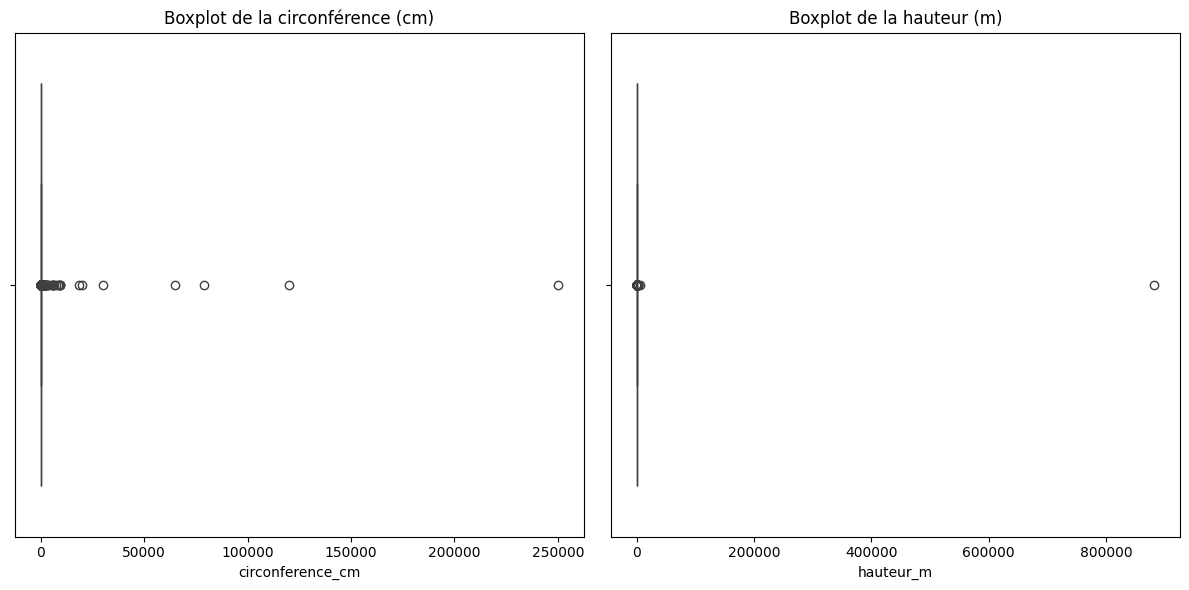

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=data['circonference_cm'], ax=axes[0])
axes[0].set_title('Boxplot de la circonférence (cm)')
sns.boxplot(x=data['hauteur_m'], ax=axes[1])
axes[1].set_title('Boxplot de la hauteur (m)')
plt.tight_layout()
plt.show()


## 🧼 Nettoyages des données

- Doublons
- Valeurs manquantes (NaN)
- Erreurs lexicales
- Erreurs d'irrégularité
- Outliers (valeurs aberrantes)
- Format des dates

### Vérification des doublons

In [13]:
data.shape[0]

200137

In [14]:
data['id'].unique().size

200137

In [15]:
data.loc[data['id'].duplicated(keep=False),:]

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, complement_addresse, numero, lieu, id_emplacement, libelle_francais, genre, espece, variete, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

In [16]:
# Vérification de doublons pour les coodonnées de localisation
data.loc[data[['geo_point_2d_a', 'geo_point_2d_b', 'id_emplacement']].duplicated(keep=False)]

id type_emplacement domanialite     arrondissement  \
189133  2011522            Arbre      Jardin  BOIS DE VINCENNES   
189134  2011523            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
189133                 NaN     NaN   
189134                 NaN     NaN   

                                               lieu id_emplacement  \
189133  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         190042   
189134  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         190042   

       libelle_francais    genre espece   variete  circonference_cm  \
189133         Peuplier  Populus  nigra       NaN                 0   
189134         Peuplier  Populus  nigra  Italica'               100   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
189133          0                 NaN          0.0       48.836416   
189134         22                   A          0.0       48.836416   

        geo_point_2d_b  
189133        2.446277  
189134        2.446277

In [17]:
# Suppression de la ligne index=189133
data.drop(index=[189133], inplace=True)

In [18]:
# Vérification
data.loc[data[['geo_point_2d_a', 'geo_point_2d_b', 'id_emplacement']].duplicated(keep=False)]

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, complement_addresse, numero, lieu, id_emplacement, libelle_francais, genre, espece, variete, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

Il n'existe plus de doublons dans notre jeu de données.

### Suppression de variables

#### Variable `type_emplacement`

`type_emplacement` ne contient qu'une seule modalité **Arbre**. Elle ne nous apporte aucune information et peut donc être supprimée.

In [19]:
data['type_emplacement'].unique()

array(['Arbre'], dtype=object)

In [20]:
data.drop('type_emplacement', axis=1, inplace=True)

### Traitement de données manquantes

In [21]:
# Afficher les valeurs manquantes pour chaque colonne
print(data.isna().sum())

id                          0
domanialite                 1
arrondissement              0
complement_addresse    169234
numero                 200136
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163359
circonference_cm            0
hauteur_m                   0
stade_developpement     67204
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


#### Variable `numero`

La variable `numero` est **toujours vide**.

> Nous décidons de supprimer cette colonne.

In [22]:
data.drop(columns=['numero'], inplace=True)

#### Variable `complement_addresse`

Un complement d'adresse est optionnel. Il est donc tout à fait normal qu'il soit vide parfois. Cela ne genera pas notre analyse future.

#### Variables `domanialite`, `genre`, `espece`

Les NaNs sont peu nombreux pour les colonnes suivantes :
- domanialite
- genre
- espece

> Nous décidons de laisser les valeurs manquantes

**Préconisation** : Effectuer une tournée de relevé pour obtenir les informations et remplir ces champs.

In [23]:
data.shape

(200136, 16)

In [24]:
print(data[['domanialite', 'genre', 'espece']].isna().sum())

domanialite       1
genre            16
espece         1752
dtype: int64


In [25]:
data[data['domanialite'].isna()]

id domanialite   arrondissement complement_addresse  \
197239  2020911         NaN  PARIS 20E ARRDT                 NaN   

                                                     lieu id_emplacement  \
197239  JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...         203006   

       libelle_francais         genre   espece variete  circonference_cm  \
197239      Chimonanthe  Chimonanthus  praecox     NaN                35   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
197239          4                  JA          0.0       48.849547   

        geo_point_2d_b  
197239         2.41419

#### Variable `stade_developpement`


> Nous décidons de remplacer les NaNs par la modalité `I` (pour inconnu). Puis de remplacer les initiales par des noms :
- J = Jeune
- JA = Jeune Adulte
- A = Adulte
- M = Mature
- I = Inconnu (NaN)

In [29]:
# Afficher les modalités possible de cette colonne
data ['stade_developpement'].unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

In [30]:
# Compter le nombre de NaNs dans cette colonne
data['stade_developpement'].isna().sum()

67204

In [31]:
# Remplacer Nan par une nouvelle modalité : 'I'
data['stade_developpement'] = data['stade_developpement'].fillna(value='I')

In [32]:
data["stade_developpement"].value_counts()

stade_developpement
I     67204
A     64438
JA    35444
J     26937
M      6113
Name: count, dtype: int64

In [33]:
# Remplacer les initiales par des noms
stade_developpement_modalites = {
    'J' : 'Jeune',
    'JA' : 'Jeune Adulte',
    'A' : 'Adulte',
    'M' : 'Mature',
    'I' : 'Inconnu'
}

data['stade_developpement'].replace(to_replace=stade_developpement_modalites, inplace=True)

In [34]:
data["stade_developpement"].value_counts()

stade_developpement
Inconnu         67204
Adulte          64438
Jeune Adulte    35444
Jeune           26937
Mature           6113
Name: count, dtype: int64

#### Variable `remarquable` (Booléen)

1. Nous considérons qu'une valeur vide (NaN) est 'non-remarquable'et décidons de la remplacer par `0` (soit `False`) (imputation "métier" ou "fonctionnelle")
2. Les valeurs uniques sont `0` ou `1`, il s'agit d'une variable qualitative **booléenne**.

> Nous convertissons cette variable au bon **'dtype'**.

La variable `remarquable` peut nous servir pour organiser une tournée particulière d'une équipe d'entretien, plus experimentée.

In [35]:
# Modalités de cette variable
data['remarquable'].unique()

array([ 0., nan,  1.])

In [36]:
# Compter les valeurs manquantes
data['remarquable'].isna().sum()

63098

In [37]:
data['remarquable'] = data['remarquable'].fillna(value=0.)

In [38]:
data['remarquable'].value_counts()

remarquable
0.0    199952
1.0       184
Name: count, dtype: int64

In [39]:
# Convertion en booléen
data['remarquable'] = data['remarquable'].astype('bool')

In [40]:
data['remarquable'].unique()

array([False,  True])

In [41]:
data['remarquable'].value_counts()

remarquable
False    199952
True        184
Name: count, dtype: int64

#### Variable `variete`

Définition de "Variété" en botanique :

- Un rang taxonomique de niveau inférieur au rang d'espèce (« infraspécifique »)
- Il permet de circonscrire et de **regrouper plus finement un ensemble d'individus** (une population) différant **légèrement** des autres individus conspécifiques, par un ou plusieurs caractères considérés comme **mineurs**.

> Cette variable peut être considérée comme secondaire. Nous décidons de **laisser les valeurs manquantes**.

In [42]:
# Valeurs manquantes de variété
data['variete'].isna().sum()

163359

Il y a une `'` dans les variétés. Nous nettoyons cette variable.

In [43]:
data['variete'].unique()[:20]

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'",
       "Aspleniifolia'", "Jacquemontii'", "Fastigiata'",
       "Fastigiate Koster'", "Imperialis'", "Honey Dew'",
       "Jacqueline Hillier'", "Rubra Plena'", "Diversifolia'",
       "Flamingo'"], dtype=object)

In [44]:
data['variete'] = data['variete'].str.replace("'", '') # supprimer ' dans les valeurs
data['variete'] = data['variete'].str.strip() # nettoie les espace avant et après

In [45]:
data['variete'].unique()[:20]

array([nan, 'Atropunicea', 'Euchlora', 'Schwedleri', 'Pissardii',
       'Pallida', 'n. sp.', 'Chanticleer', 'Purpureum', 'Italica',
       'Aspleniifolia', 'Jacquemontii', 'Fastigiata', 'Fastigiate Koster',
       'Imperialis', 'Honey Dew', 'Jacqueline Hillier', 'Rubra Plena',
       'Diversifolia', 'Flamingo'], dtype=object)

#### Bilan valeurs manquantes

In [46]:
data.isna().sum()

id                          0
domanialite                 1
arrondissement              0
complement_addresse    169234
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163359
circonference_cm            0
hauteur_m                   0
stade_developpement         0
remarquable                 0
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

### Valeurs aberrantes
- **valeur aberrante** : c'est une valeur qui est manifestement fausse
- **valeur atypique** : c'est une valeur qui "sort du lot", mais pas forcément fausse.

> Si vous souhaitez faire une **moyenne**, créez un sous-échantillon dans lequel vous ne considérez pas les outliers. Mais si vous calculez aussi la **médiane**, travaillez sur l’échantillon de départ.

#### Identifier les variables pertinentes à analyser

- `hauteur_m`
- `circonference_cm`
- `geo_point_2d_a`
- `geo_point_2d_b`

> Nous analysons le **minimum** et **maximum** pour chaque variable quantative, à l'aide de la fonction `describe()`.

In [47]:
data[['hauteur_m', 'circonference_cm', 'geo_point_2d_a', 'geo_point_2d_b']].describe()

hauteur_m  circonference_cm  geo_point_2d_a  geo_point_2d_b
count  200136.000000     200136.000000   200136.000000   200136.000000
mean       13.110575         83.380896       48.854491        2.348207
std      1971.222311        673.191869        0.030234        0.051219
min         0.000000          0.000000       48.742290        2.210241
25%         5.000000         30.000000       48.835021        2.307530
50%         8.000000         70.000000       48.854163        2.351095
75%        12.000000        115.000000       48.876447        2.386834
max    881818.000000     250255.000000       48.911485        2.469759

#### Taille de l'arbre (`hauteur_m`, `circonference_cm`)

Informations sur les plus grands arbres de Paris :
- **Le plus grand** : le Séquoia des Buttes-Chaumont : D’une circonférence de 4,70 m et d’une **hauteur de plus de 35 mètres**
- **Le plus gros** : platane d’Orient du Parc Monceau : son tronc mesure en effet **7 mètres de circonférence** pour une hauteur de 31 mètres environ !

Source  : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris

Nous trouvons dans notre échantillon des **valeurs aberrantes** cas des valeurs qui dépassent les valeurs possibles descrites ci-dessus.

#### Indentification des valeurs aberrantes

In [48]:
# Arbres trop petits
print(f"Arbres de hauteur 0 m : {data[data['hauteur_m'] == 0].shape[0]}")
print(f"Arbres de circonférence 0 cm : {data[data['circonference_cm'] == 0].shape[0]}")

# Arbres trop grands
print(f"Arbres dont la hauteur est supérieure à 35 m : {data[data['hauteur_m'] > 35].shape[0]}")
print(f"Arbres dont la circonférence est supérieure à 700 cm : {data[data['circonference_cm'] > 700].shape[0]}")

Arbres de hauteur 0 m : 39218
Arbres de circonférence 0 cm : 25866
Arbres dont la hauteur est supérieure à 35 m : 509
Arbres dont la circonférence est supérieure à 700 cm : 82


#### Préconisation

- **Effectuer une tournée de mesures** des arbres dont les valeurs sont aberrantes.
  1. Obtenir la liste des arbres dont la taille est `0` ou `> 35` et la circonférence `0` ou `> 7`.
  2. Placer ces arbres sur une carte pour faciliter les tournée de mesures.

In [49]:
# Renommer les colonnes de coordonnées GPS
data.rename(columns={'geo_point_2d_a' : 'latitude', 'geo_point_2d_b' : 'longitude'}, inplace=True)

In [50]:
# Placer ces arbres sur une carte
import plotly.express as px

data_abberantes = data[(data['hauteur_m'] == 0) | (data['circonference_cm'] == 0) | (data['hauteur_m'] > 35) | (data['circonference_cm'] > 700)]
print(data_abberantes.shape)

fig = px.scatter_mapbox(data_abberantes, lat='latitude', lon='longitude', size_max=15, zoom=11, mapbox_style = 'carto-positron', width=1200, height=800)
fig.show()

(40165, 16)


#### `hauteur_m`

Valeurs aberrantes pour la hauteur :

- `hauteur_m` = 0 m

- `hauteur_m` > 35 m

Nous décidons de **supprimer les individus présentant ces valeurs** pour effectuer par la suite notre analyse univariée/bivariée.


In [51]:
data_no_abb = data.copy()

In [52]:
# hauteur_m : minimum
print(f"{data[data['hauteur_m'] == 0]['hauteur_m'].count()} arbres ont la hauteur de 0 m.")
# hauteur_m : maximum
print(f"{data[data['hauteur_m'] > 35]['hauteur_m'].count()} arbres ont une hauteur supérieure à 35 m.")

39218 arbres ont la hauteur de 0 m.
509 arbres ont une hauteur supérieure à 35 m.


In [53]:
# Suppression des individus comprenant des valeurs aberrantes
data_no_abb = data_no_abb.drop(data_no_abb[(data_no_abb['hauteur_m'] == 0) | (data_no_abb['hauteur_m'] > 35)].index)

In [54]:
# Vérification
print(f"Arbres de hauteur 0 m : {data_no_abb[data_no_abb['hauteur_m'] == 0].shape[0]}")
print(f"Arbres dont la hauteur est supérieure à 35 m : {data_no_abb[data_no_abb['hauteur_m'] > 35].shape[0]}")

Arbres de hauteur 0 m : 0
Arbres dont la hauteur est supérieure à 35 m : 0


### `circonference_cm`

Valeurs aberrantes pour la circonférence :

- `circonference_cm` = 0 cm

- `circonference_cm` > 700 cm

Nous décidons de **supprimer les individus présentant ces valeurs** pour effectuer par la suite notre analyse univariée/bivariée.

In [55]:
print(f"Arbres de circonférence 0 cm : {data[data['circonference_cm'] == 0].shape[0]}")
print(f"Arbres dont la circonférence est supérieure à 700 cm : {data[data['circonference_cm'] > 700].shape[0]}")

Arbres de circonférence 0 cm : 25866
Arbres dont la circonférence est supérieure à 700 cm : 82


In [56]:
# Suppression des valeurs aberrantes
data_no_abb = data_no_abb.drop(data_no_abb[(data_no_abb['circonference_cm'] == 0) | (data_no_abb['circonference_cm'] > 700)].index)

In [57]:
print(f"Arbres de circonférence 0 cm : {data_no_abb[data_no_abb['circonference_cm'] == 0].shape[0]}")
print(f"Arbres dont la circonférence est supérieure à 700 cm : {data_no_abb[data_no_abb['circonference_cm'] > 700].shape[0]}")

Arbres de circonférence 0 cm : 0
Arbres dont la circonférence est supérieure à 700 cm : 0


### Coordonnnées GPS (`geo_point_2d_a`, `geo_point_2d_b`)

> Nous dessinons un carré sur une carte avec les valeurs minimum et maximum de ces deux variables. Nous vérifions que nous obtenons un carré qui couvre uniquement Paris.

- https://plotly.com/python/

In [58]:
import plotly.graph_objects as go

# Dessiner un carré sur la carte avec les valeurs minimale et maximales
lat_min = data['latitude'].min()
lat_max = data['latitude'].max()
lon_min = data['longitude'].min()
lon_max = data['longitude'].max()

fig = go.Figure(go.Scattermap(
    fill = "toself",
    lon = [lon_max, lon_min, lon_min, lon_max], lat = [lat_max, lat_max, lat_min, lat_min],
    marker = { 'size': 10, 'color': "orange" }))

fig.update_layout(
    map = {
        'style': "carto-positron",
        'center': {'lon': 2.3483915, 'lat': 48.8534951 },
        'zoom': 9},
        showlegend = False)

fig.show()

In [59]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', size_max=15, zoom=11, mapbox_style = 'carto-positron', width=1200, height=800)
fig.show()

### Valeurs atypiques

#### Détection des valeurs atypiques en utilisant la méthode interquartile (IQR)

<img src="https://www.machinelearningplus.com/wp-content/uploads/2023/07/93ae3b25-d59b-4cef-ab17-a2af415d59cd.jpg" width="700"/>

In [61]:
data_clean = data_no_abb.copy()

#### Hauteur

<Axes: >

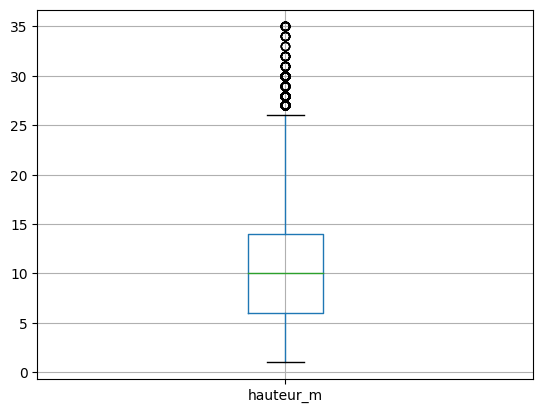

In [62]:
# Afficher les valeurs atypiques restantes (Boîtes à moustaches)
data_clean.boxplot(column='hauteur_m')

In [63]:
def iqr_detection(df, col_name):
  """
  Fonction
  """
  # Ranger les valeurs dans l'ordre
  sorted_data = df[col_name].sort_values()

  # Calculer les quartiles Q1 et Q3
  q1 = sorted_data.quantile(0.25)
  q3 = sorted_data.quantile(0.75)

  # Calculer la plage interquartile (IQR)
  IQR = q3 - q1
  print('Plage interquartile (IQR) :', IQR)
  print()

  lower_limit = q1 - 1.5*IQR
  upper_limit = q3 + 1.5*IQR

  lower_limitoutliers = sorted_data[sorted_data < lower_limit]
  upper_limitoutliers = sorted_data[sorted_data > upper_limit]

  print(f"Limite basse : {lower_limit}")
  print(f"Nombre de lignes : {lower_limitoutliers.shape[0]}")
  print()
  print(f"Limite haute : {upper_limit}")
  print(f"Nombre de lignes : {upper_limitoutliers.shape[0]}")

  return lower_limit, upper_limit

In [64]:
data_clean['hauteur_m'].median()

10.0

In [65]:
data_clean['hauteur_m'].mean()

10.363228335135743

In [66]:
hauteur_m_lower_limit, hauteur_m_upper_limit = iqr_detection(data_clean, 'hauteur_m')

Plage interquartile (IQR) : 8.0

Limite basse : -6.0
Nombre de lignes : 0

Limite haute : 26.0
Nombre de lignes : 731


- Il n'y a aucune ligne qui correspond au critère de limite basse
- Nous remplaçons les lignes qui dépasse la limite haute, par la valeur de la limite haute. (Nous pourrions également les supprimer)

In [67]:
# Remplacer les lignes qui dépasse la limite haute, par la valeur de la limite haute.
# data_clean.loc[data_clean['hauteur_m'] > hauteur_m_upper_limit, 'hauteur_m'] = hauteur_m_upper_limit

# Supprimer
data_clean.drop(data_clean[data_clean['hauteur_m'] > hauteur_m_upper_limit].index, inplace=True)


<Axes: >

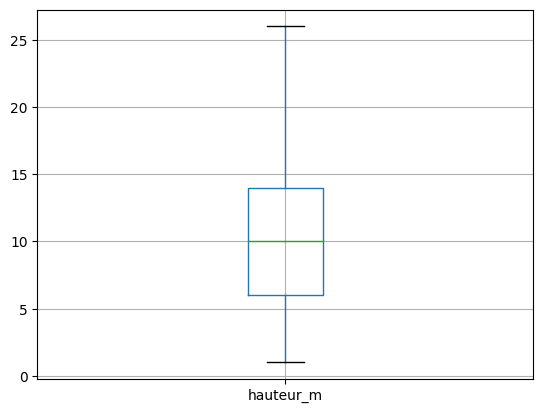

In [68]:
# Afficher les valeurs atypiques restantes (Boîtes à moustaches)
data_clean.boxplot(column='hauteur_m')

#### Circonference

<Axes: >

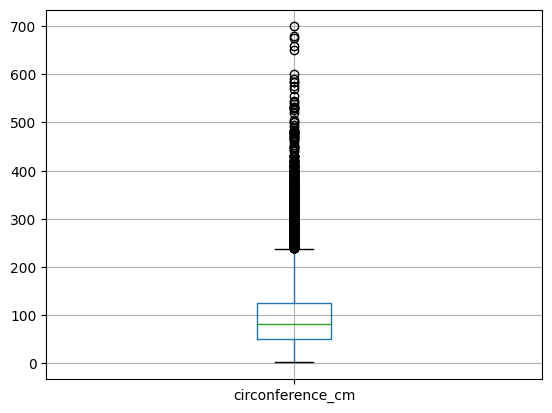

In [69]:
# Afficher les valeurs atypiques restantes (Boîtes à moustaches)
data_clean.boxplot(column='circonference_cm')

In [70]:
circonf_lower_limit, circonf_upper_limit = iqr_detection(data_clean, 'circonference_cm')

Plage interquartile (IQR) : 75.0

Limite basse : -62.5
Nombre de lignes : 0

Limite haute : 237.5
Nombre de lignes : 3227


In [71]:
# Remplacer les lignes qui dépasse la limite haute, par la valeur de la limite haute.
# data_clean.loc[data_clean['circonference_cm'] > circonf_upper_limit, 'circonference_cm'] = circonf_upper_limit

# Supprimer
data_clean.drop(data_clean[data_clean['circonference_cm'] > circonf_upper_limit].index, inplace=True)

<Axes: >

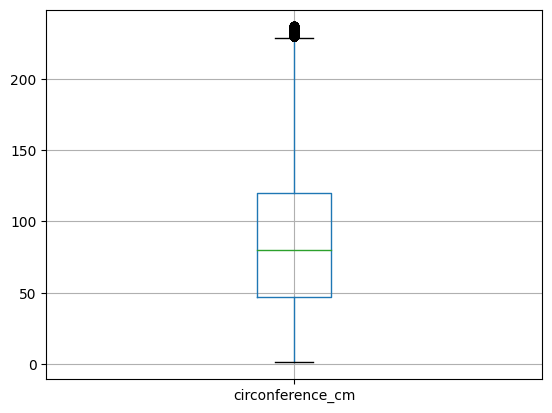

In [72]:
# Afficher les valeurs atypiques restantes (Boîtes à moustaches)
data_clean.boxplot(column='circonference_cm')

## 📊 Distribution empirique et analyse univariée

Cette section vise à afficher des statistiques et des représentations graphiques pour explorer les caractéristiques individuelles des données.


- Compter les effectifs pour chaque modalité de chaque variable.
- Afficher les indicateurs relatives à une caractéristique.

### Arrondissement

La distribution par arrondissement peut être utile pour la **répartition budgetaire** des mairies d'arrondissement.

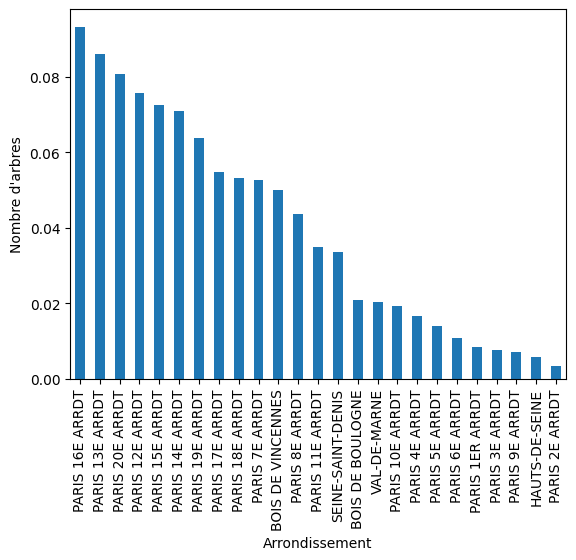

In [73]:
# Diagramme en tuyaux d'orgues
data_clean["arrondissement"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.show()

**Interprétation** :

Les arrondissements comprenant le plus grand nombre d'arbres sont :
- Paris 16ème
- Paris 13ème
- Paris 20ème

Les arrondissements comprenant le moins d'arbres sont :
- Paris 2ème
- Les Hauts-de-Seine
- Paris 9ème

Les ressources budgétaires et matérielles devront être réparties en prennant en considération le nombre d'arbres par arrondissement.

### Stade de développement

**Utilité** : Le stade de développement peut avoir un incidence sur la quantité d'eau à apporter.

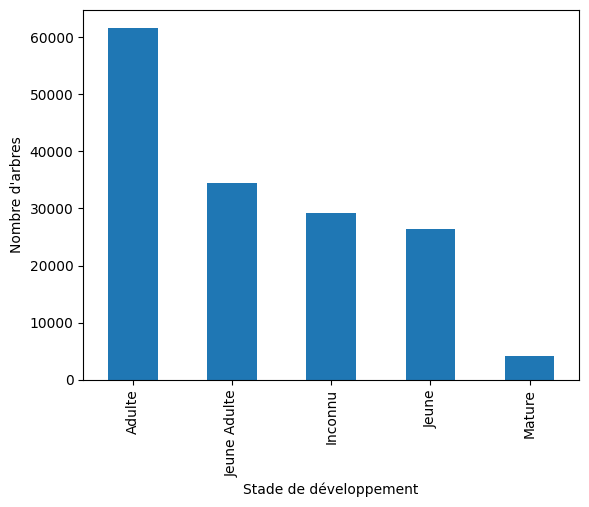

In [74]:
import matplotlib.pyplot as plt

# Diagramme en tuyaux d'orgues
data_clean["stade_developpement"].value_counts().plot(kind='bar')
plt.xlabel("Stade de développement")
plt.ylabel("Nombre d'arbres")
plt.show()

**interprétation** : Les arbres adultes sont les plus nombreux, suivi des jeunes adultes.

### Domanialite

La domanialité, cad l’emplacement des arbres dans l’espace public, a un impact sur le type de matériel nécessaire à l’entretien des arbres.

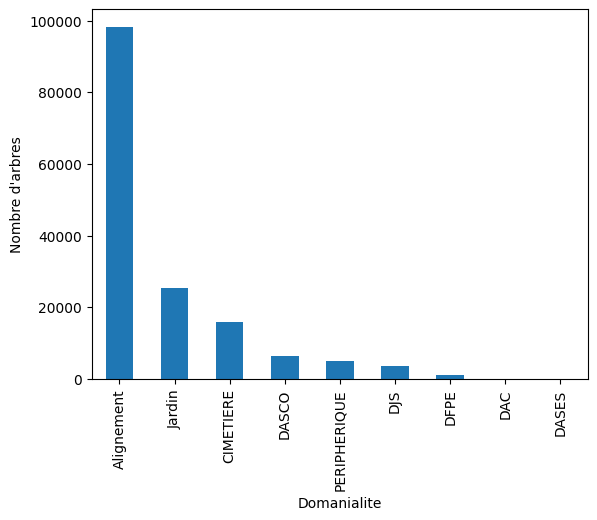

In [75]:
# Diagramme en tuyaux d'orgues
data_clean["domanialite"].value_counts().plot(kind='bar')
plt.xlabel("Domanialite")
plt.ylabel("Nombre d'arbres")
plt.show()

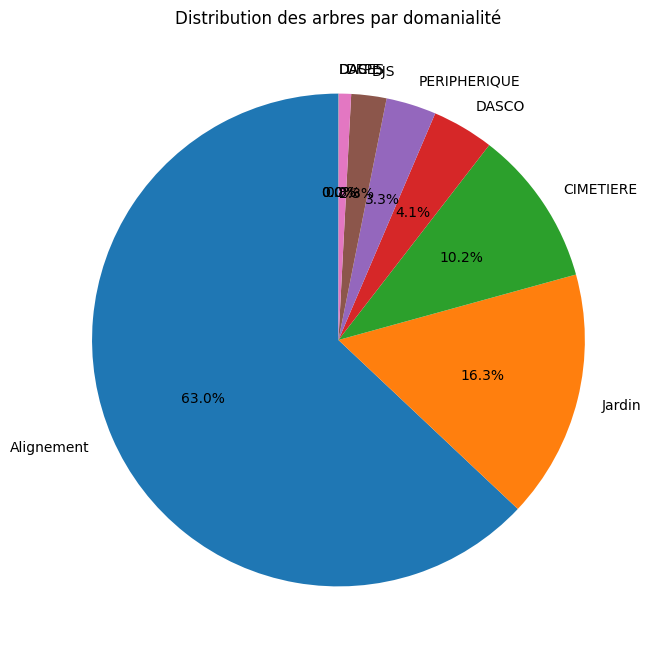

In [76]:
# Diagramme en camembert de la distribution des arbres par domanialite
domanialite_counts = data_clean["domanialite"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(domanialite_counts, labels=domanialite_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution des arbres par domanialité")
plt.show()

L’approvisionnement en matériel et outils devra refléter cette distribution domaniale.

### Affiche la distribution par hauteurs d’arbres

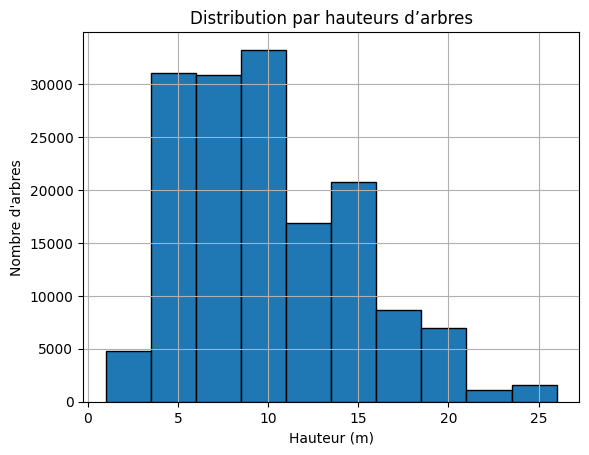

In [77]:
# Histogramme
data_clean["hauteur_m"].hist(bins=10, edgecolor='black')
plt.title("Distribution par hauteurs d’arbres")
plt.xlabel("Hauteur (m)")
plt.ylabel("Nombre d'arbres")
plt.show()

In [78]:
# Statistiques de disrtribution
data_clean['hauteur_m'].describe()

count    156013.000000
mean         10.077769
std           4.802687
min           1.000000
25%           6.000000
50%          10.000000
75%          14.000000
max          26.000000
Name: hauteur_m, dtype: float64

**Interpétation** :

### Affiche la distribution des circonférences des arbres

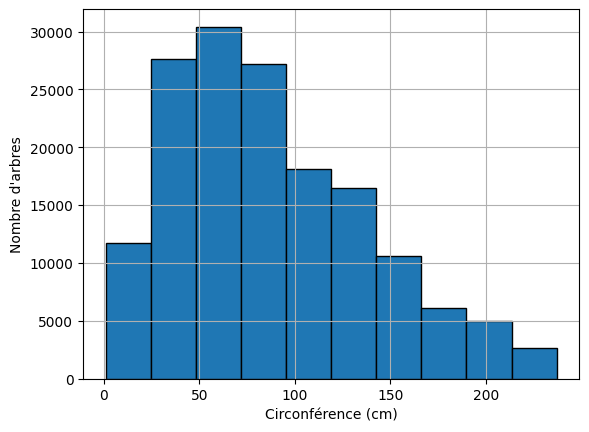

In [79]:
data_clean["circonference_cm"].hist(bins=10, edgecolor='black')
plt.xlabel("Circonférence (cm)")
plt.ylabel("Nombre d'arbres")
plt.show()

In [80]:
# Statistiques de disrtribution
data_clean['circonference_cm'].describe()

count    156013.000000
mean         87.811920
std          50.863176
min           1.000000
25%          47.000000
50%          80.000000
75%         120.000000
max         237.000000
Name: circonference_cm, dtype: float64

## 🔬 Analyse bivariée

- Hauteur et circonférence moyenne des arbres par arrondissement ✔️
- Hauteur et circonférence moyenne des arbres  remarquables vs non-remarquable ✔️
- Correlation entre circonference et hauteur ✔️
- Correlation entre libellé français et hauteur ✔️
- Correlation entre stade de développement et hauteur ✔️
- Correlation entre arrondissement et libellé français ??

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200136 entries, 0 to 200136
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200136 non-null  int64  
 1   domanialite          200135 non-null  object 
 2   arrondissement       200136 non-null  object 
 3   complement_addresse  30902 non-null   object 
 4   lieu                 200136 non-null  object 
 5   id_emplacement       200136 non-null  object 
 6   libelle_francais     198639 non-null  object 
 7   genre                200120 non-null  object 
 8   espece               198384 non-null  object 
 9   variete              36777 non-null   object 
 10  circonference_cm     200136 non-null  int64  
 11  hauteur_m            200136 non-null  int64  
 12  stade_developpement  200136 non-null  object 
 13  remarquable          200136 non-null  bool   
 14  latitude             200136 non-null  float64
 15  longitude            2

### Hauteur et ciroconférence moyenne des arbres par arrondissement


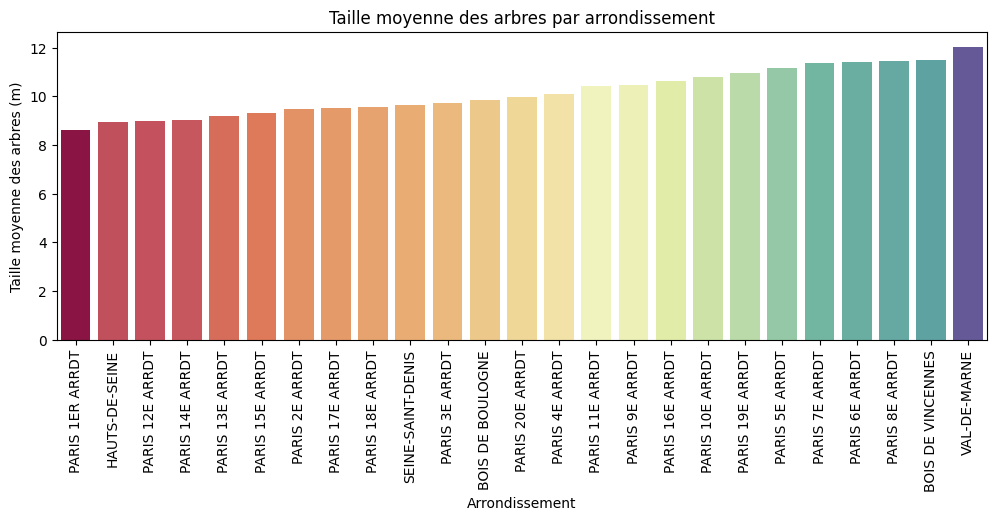

In [82]:
import seaborn as sns

# oc_purple = "#7451ebff"
# oc_marine = "#003668"
# colors = [oc_purple, oc_marine]
# color_palette = sns.color_palette(colors)
color_palette = sns.color_palette("Spectral", as_cmap=True)


# Calcul de la taille moyenne des arbres par arrondissement
hauteur_moy_par_arrond = data_clean.groupby('arrondissement')['hauteur_m'].mean()

# Tri des arrondissements par ordre croissant
hauteur_moy_par_arrond = hauteur_moy_par_arrond.sort_values()

# Création du diagramme en barres
plt.figure(figsize=(12,4))
sns.barplot(x=hauteur_moy_par_arrond.index, y=hauteur_moy_par_arrond.values, hue=hauteur_moy_par_arrond, palette=color_palette, legend=False)

# Ajout des labels et du titre
plt.xlabel("Arrondissement")
plt.ylabel("Taille moyenne des arbres (m)")
plt.title("Taille moyenne des arbres par arrondissement")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme en barres
plt.show()

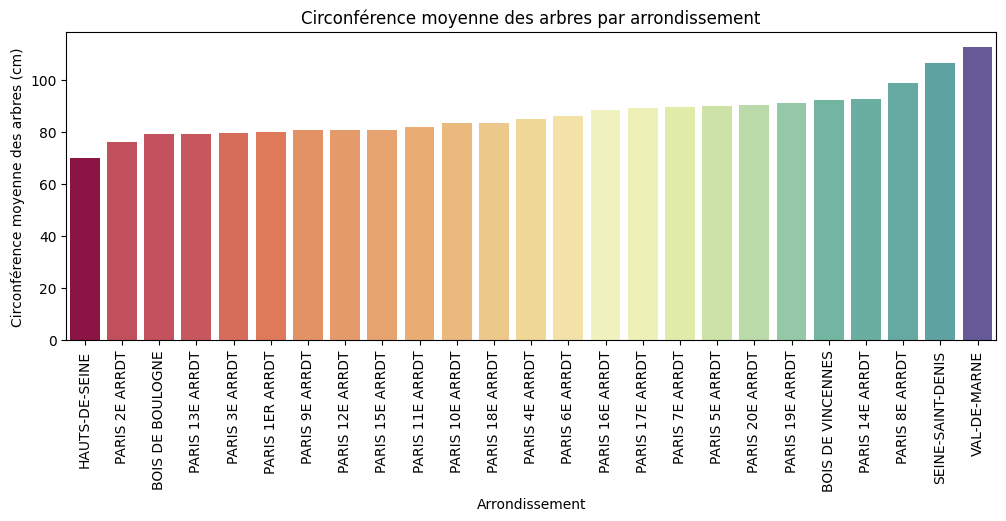

In [83]:
# Calcul de la circonférence moyenne des arbres par arrondissement
circonf_moy_par_arrond = data_clean.groupby('arrondissement')['circonference_cm'].mean()

# Tri des arrondissements par ordre croissant
circonf_moy_par_arrond = circonf_moy_par_arrond.sort_values()

# Création du diagramme en barres
plt.figure(figsize=(12,4))
sns.barplot(x=circonf_moy_par_arrond.index, y=circonf_moy_par_arrond.values, hue=hauteur_moy_par_arrond, palette=color_palette, legend=False)

# Ajout des labels et du titre
plt.xlabel("Arrondissement")
plt.ylabel("Circonférence moyenne des arbres (cm)")
plt.title("Circonférence moyenne des arbres par arrondissement")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme en barres
plt.show()

### Hauteur et circonférence moyenne des arbres  remarquables vs non-remarquable

On remarque clairement que les arbres remarquables sont plus haut et gros. Il est possible qu'ils demande un entretien particulier qui peut faire l'objet d'une tournée d'entretien spéciale.

In [84]:
data_no_abb.groupby('remarquable')['hauteur_m'].describe()

count       mean       std  min   25%   50%   75%   max
remarquable                                                            
False        159792.0  10.353278  5.122160  1.0   6.0  10.0  14.0  35.0
True            179.0  19.245810  7.680847  3.0  13.5  20.0  26.0  35.0

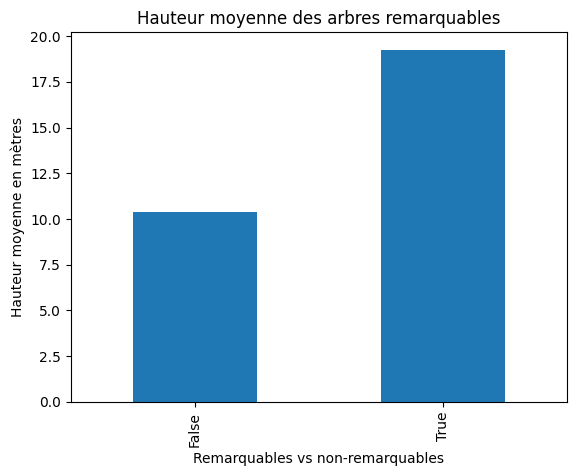

In [85]:
data_no_abb.groupby('remarquable')['hauteur_m'].mean().plot.bar()
plt.xlabel("Remarquables vs non-remarquables")
plt.ylabel("Hauteur moyenne en mètres")
plt.title("Hauteur moyenne des arbres remarquables")
plt.show()

In [86]:
data_no_abb.groupby('remarquable')['circonference_cm'].describe()

count        mean         std   min    25%    50%    75%  \
remarquable                                                                
False        159792.0   92.225343   58.312070   1.0   50.0   80.0  125.0   
True            179.0  287.837989  142.117104  30.0  174.0  250.0  384.0   

               max  
remarquable         
False        700.0  
True         695.0

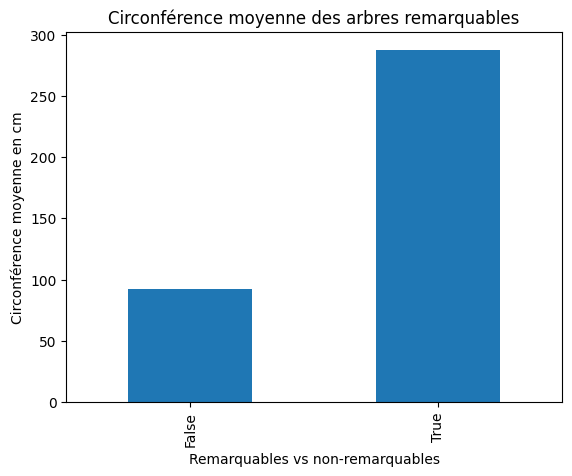

In [87]:
data_no_abb.groupby('remarquable')['circonference_cm'].mean().plot.bar()
plt.xlabel("Remarquables vs non-remarquables")
plt.ylabel("Circonférence moyenne en cm")
plt.title("Circonférence moyenne des arbres remarquables")
plt.show()

In [88]:
# Carte des arbres remarquables
fig = px.scatter_mapbox(data_no_abb[data_no_abb['remarquable'] == True],
                        lat='latitude',
                        lon='longitude',
                        size_max=15,
                        zoom=11,
                        mapbox_style='carto-positron',
                        width=1200,
                        height=800,
                        color="hauteur_m",
                        size="hauteur_m",
                        title='Arbres remarquables'
                        )
fig.show()

In [89]:
# remarquable / Arrondissement ?
# Nombre d'abres remarquables par arrondissement

**Interpétation** :

###  Correlation entre circonference et hauteur

> Deux variables quantitatives

#### Méthode utilisées:
- Diagramme de dispersion
- Coefficient de corrélation de Pearson

#### Diagramme de dispersion

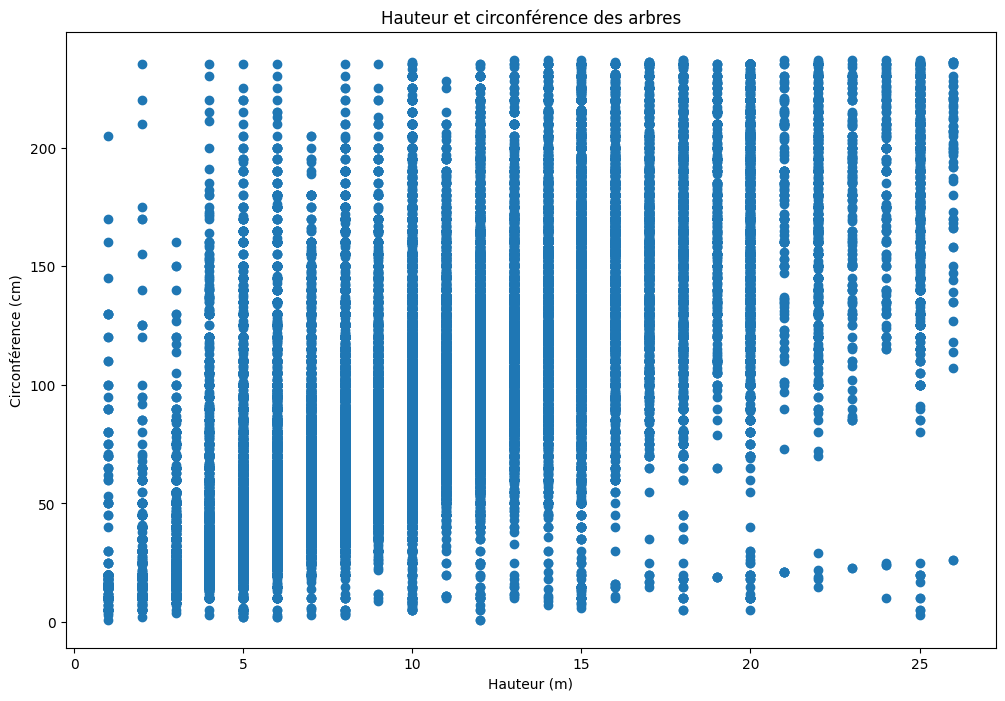

In [90]:
# Diagramme de dispersion
plt.figure(figsize=(12,8))
plt.scatter(data_clean['hauteur_m'], data_clean['circonference_cm'])
plt.ylabel("Circonférence (cm)")
plt.xlabel("Hauteur (m)")
plt.title("Hauteur et circonférence des arbres")
plt.show()

#### Coefficient de corrélation de Pearson

In [91]:
# Coefficient de corrélation de Pearson
data_clean[['circonference_cm', 'hauteur_m']].corr()

circonference_cm  hauteur_m
circonference_cm          1.000000   0.801414
hauteur_m                 0.801414   1.000000

**Interprétation** : Nous observons une forte corrélation entre la hauteur et la circonférence.

#### Régression linéaire

In [92]:
# Régression linéaire
import statsmodels.api as sm

def reg_lin(X, Y):
  # Y = data_clean['circonference_cm']
  # X = data_clean[['hauteur_m']]
  X = X.copy() # On modifiera X, on en crée donc une copie
  X['intercept'] = 1.
  result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
  a,b = result.params['hauteur_m'],result.params['intercept']
  return a, b

In [93]:
a, b = reg_lin(data_clean[['hauteur_m']], data_clean['circonference_cm'])
print(a, b)

8.487428754658394 2.2775717659076173


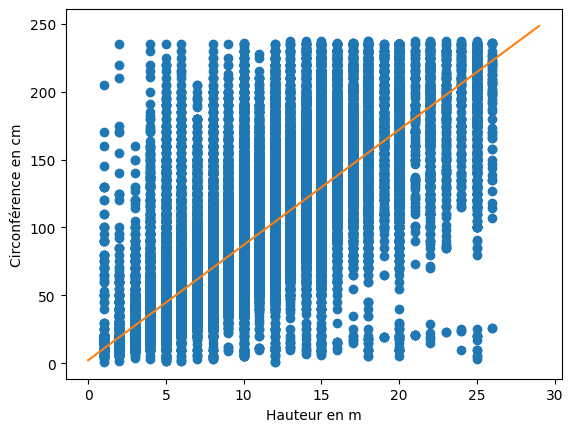

In [94]:
plt.plot(data_clean.hauteur_m, data_clean.circonference_cm, "o")
plt.plot(np.arange(30),[a*x+b for x in np.arange(30)])
plt.xlabel("Hauteur en m")
plt.ylabel("Circonférence en cm")
plt.show()

Pente :  8.48742875465839
Ordonnée à l'origine :  2.2775717659075667
Racine carrée de l'erreur quadratique moyenne (RMSE) :  925.4785554497472
Sccore R2 :  0.6422643750880297



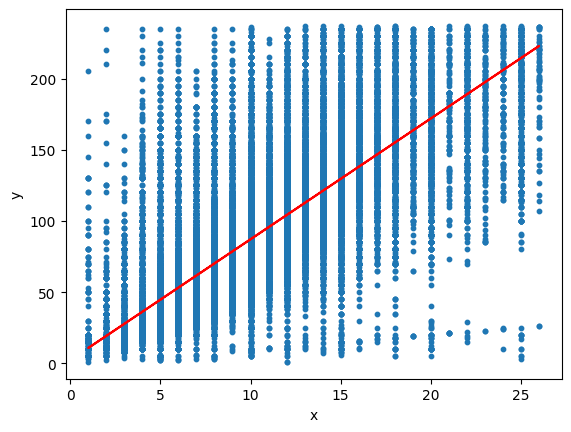

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data_clean[['hauteur_m']]
y = data_clean['circonference_cm']

# Implémentation avec sckit-learn
regression_model = LinearRegression()

# Adapter les données (entraînement du modèle)
regression_model.fit(x, y)

# Prédiction
y_predicted = regression_model.predict(x)

# Évaluation du modèle
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# Affichage des valeurs
print("Pente : " , regression_model.coef_[0])
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne (RMSE) : ", rmse)
print('Sccore R2 : ', r2)
print()

# Tracée des valeurs
# Points de données
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# Valeurs prédites
plt.plot(x, y_predicted, color='r')
plt.show()

### Correlation entre libellé français et hauteur

> Une variable qualitative et une variable quantitative

#### Méthode utilisées :

- Analyse de la variance ([ANOVA](https://datatab.fr/tutorial/anova))
- Calcul du rapport de corrélation (eta carré)

> Etudier la correlation entre le libellé français et la hauteur de l'arbre pourrait nous permettre d'extrapoler une hauteur pour les arbres dont les hauteurs sont abberantes/erronées.

#### Hauteur moyenne par libellé français (les 20 plus fréquents)

In [96]:
# Top 20 des libellé français les plus nombreux
hauteur_moy_par_libelle_francais = data_clean.loc[data_clean['libelle_francais'].isin(data_clean['libelle_francais'].value_counts()[:20].index)].groupby('libelle_francais')['hauteur_m'].mean().sort_values(ascending=False)

In [97]:
# Moyennes de hauteurs classées par ordre décroissant
hauteur_moy_par_libelle_francais.rename("moyenne_hauteur_m", inplace=True)

libelle_francais
Peuplier                14.364397
Platane                 12.492675
Marronnier              11.180183
Robinier                10.634069
Tilleul                 10.269297
Erable                  10.029928
Pin                      9.996652
Sophora                  9.903456
Orme                     9.681759
Chêne                    9.351423
Frêne                    8.915017
Bouleau                  8.554264
Paulownia                8.399317
Noisetier de Byzance     7.993086
Micocoulier              7.848866
Charme                   7.345877
If                       7.145721
Faux-cyprès              7.109515
Poirier à fleurs         6.326078
Cerisier à fleurs        5.194263
Name: moyenne_hauteur_m, dtype: float64

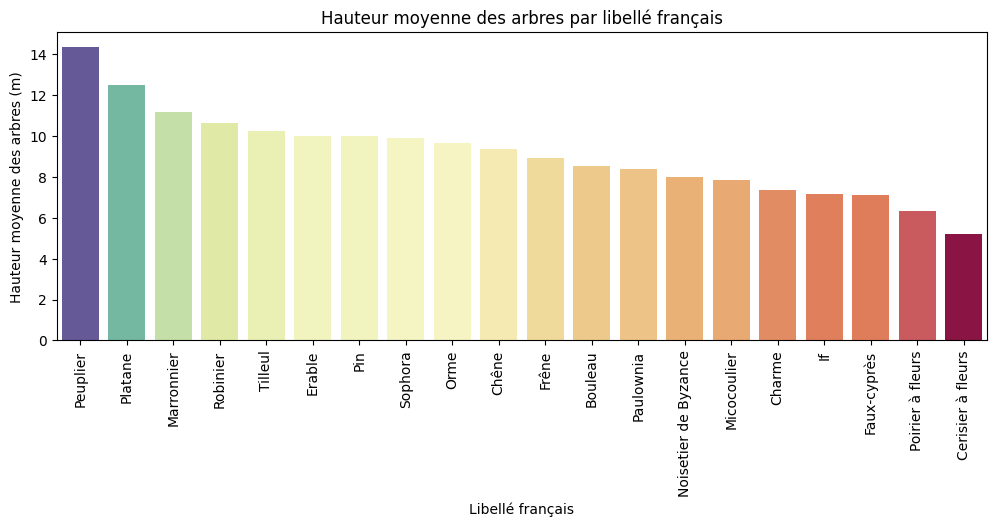

In [98]:
# Création du diagramme en barres
plt.figure(figsize=(12,4))
sns.barplot(x=hauteur_moy_par_libelle_francais.index, y=hauteur_moy_par_libelle_francais.values, hue=hauteur_moy_par_libelle_francais, palette=color_palette, legend=False)

# Ajout des labels et du titre
plt.xlabel("Libellé français")
plt.ylabel("Hauteur moyenne des arbres (m)")
plt.title("Hauteur moyenne des arbres par libellé français")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme en barres
plt.show()

#### Recherche de correlation entre libellé français et hauteur

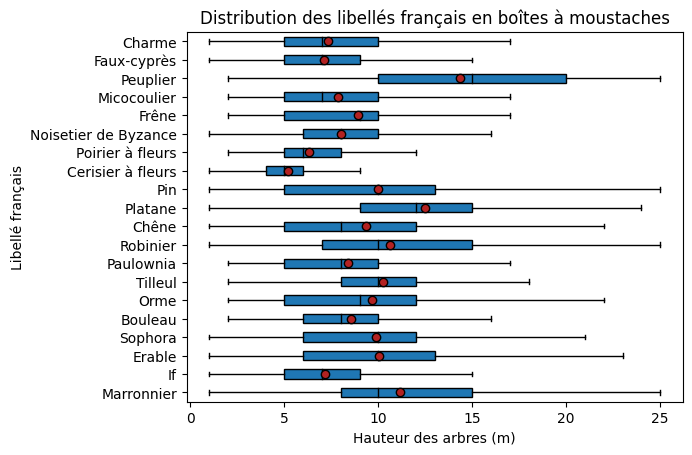

In [99]:
X = "libelle_francais" # qualitative
Y = "hauteur_m" # quantitative

# On ne garde que les dépenses
sous_echantillon = data_clean.copy()

# Les 20 libellés français les plus fréquents
modalites = sous_echantillon.loc[sous_echantillon[X].isin(sous_echantillon[X].value_counts()[:20].index)][X].unique()
# modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Distribution des libellés français en boîtes à moustaches')
plt.ylabel("Libellé français")
plt.xlabel("Hauteur des arbres (m)")
plt.show()

In [100]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x[x.notna()].unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return round(SCE/SCT, 2)

eta_squared(data_clean['libelle_francais'], data_clean['hauteur_m'])

0.22

**Interprétation** : Ce résultat montre une légere association entre le libellé et la hauteur des arbres.  

### Correlation entre stade de développement et hauteur

> Une variable qualitative et une variable quantitative

In [101]:
hauteur_moy_par_stade_developpement = data_clean.groupby('stade_developpement')['hauteur_m'].mean().sort_values(ascending=False)

In [102]:
hauteur_moy_par_stade_developpement

stade_developpement
Mature          17.920314
Adulte          12.913139
Jeune Adulte     9.050762
Inconnu          8.071766
Jeune            5.758452
Name: hauteur_m, dtype: float64

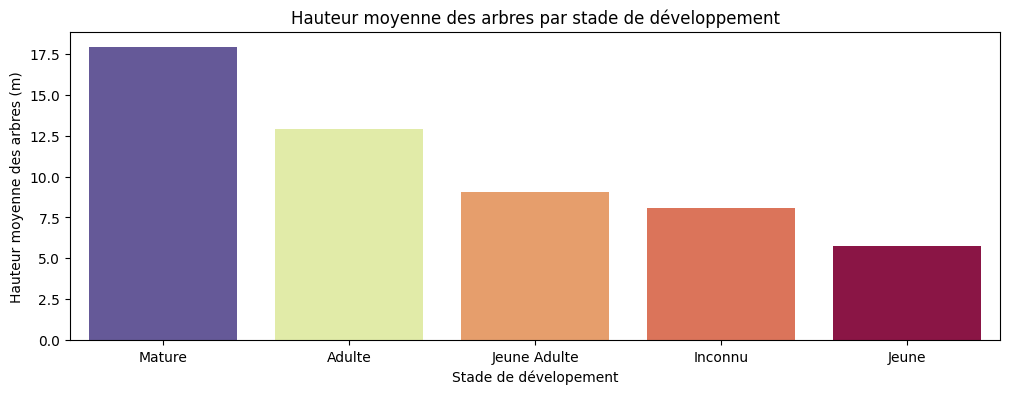

In [103]:
# Création du diagramme en barres
plt.figure(figsize=(12,4))
sns.barplot(x=hauteur_moy_par_stade_developpement.index, y=hauteur_moy_par_stade_developpement.values, hue=hauteur_moy_par_stade_developpement, palette=color_palette, legend=False)

# Ajout des labels et du titre
plt.xlabel("Stade de dévelopement")
plt.ylabel("Hauteur moyenne des arbres (m)")
plt.title("Hauteur moyenne des arbres par stade de développement")
plt.show()

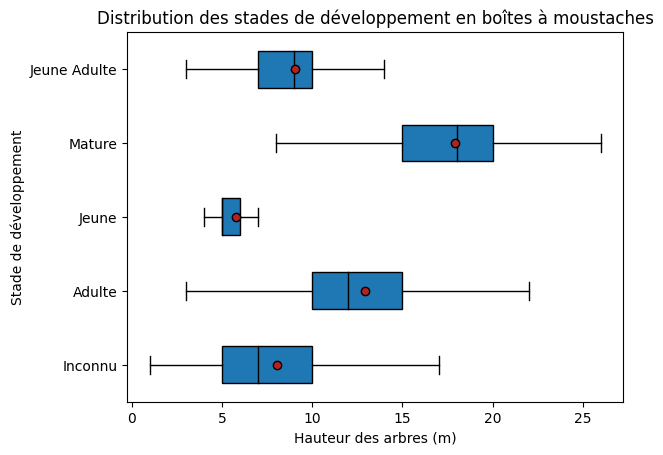

In [104]:
X = "stade_developpement" # qualitative
Y = "hauteur_m" # quantitative

# On ne garde que les dépenses
sous_echantillon = data_clean.copy()

# Les 20 libellés français les plus fréquents
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Distribution des stades de développement en boîtes à moustaches')
plt.ylabel("Stade de développement")
plt.xlabel("Hauteur des arbres (m)")
plt.show()

In [105]:
# Calcul du rapport de correlation entre le stade de développement et la hauteur
eta_squared(data_clean['stade_developpement'], data_clean['hauteur_m'])

0.39

**Interprétation** : La hauteur augmente en fonction du stade du développement Attention, la catégorie `inconnu` brouille la qualité de nos résultats d'analyse. La corrélatino est probablement encore plus grande.

In [106]:
# Calcul du rapport de correlation entre le stade de développement et la circonférence
eta_squared(data_clean['stade_developpement'], data_clean['circonference_cm'])

0.47

## 🎯 Synthèse et préconisations

**Objectif principal :** Optimiser les tournées d'entretien des arbres en se basant sur les retours d'experts des professionnels des espaces verts.

### Caractéristiques clés identifiées par les experts :

Après consultation auprès de professionnels des espaces verts, il apparait que les variables suivantes soient les plus importantes à prendre en considération :

- **Espèce** : entretien spécifique (taille, fertilisation, etc.)
- **Stade de développement** : besoins en eau et en soins
- **Hauteur et circonférence** : complexité des travaux d'élagage et la sécurité des opérations.
- **Domanialité** : emplacement de l’arbre dans l’espace public
- **Géolocalisation et arrondissement** : permet de trouver un itinéraire optimale pour la tournée d'entretien.

### Préconisations d'après notre étude

#### 1. Réaliser une tournée de mesures

**Réaliser une tournée de mesure** pour **remplir les valeurs manquantes** et **corriger les valeurs aberrantes** rencontrée dans le jeu de données.
- `genre` (valeurs manquantes)
- `espece` (valeurs manquantes)
- `libelle_francais` (valeurs manquantes)
- `domanialité` (valeurs manquantes)
- `hauteur_m` (valeurs aberrantes: 0 et > 35 m)
- `circonference_cm` (valeurs aberrantes: 0 et > 700 cm)

#### 2. Ajouter la variable `remarquable` aux variables importantes

Les arbres remarquables étant **en moyenne plus haut et gros**, il est possible qu'ils demandent un **entretien particulier** qui peut faire l'objet d'une tournée d'entretien spéciale, qui mobilise une équipe dédiée.

### Développement de modèles d'optimisation de tournée d'entretien

* **Ajustement des modèles d'optimisation**  : Les modèles d'optimisation des tournées devront être adaptés pour prendre en compte les spécificités de chaque espèce d'arbre et les contraintes liées à la hauteur, au stade de développement, à la circonférence et à la domanialité, ainsi qu’à l’arrondissement pour la composition des équipes.
* **Intégration de la dimension géographique** : La géolocalisation doit être intégré dans l'algorithme d'optimisation pour minimiser les distances parcourues.
* **Problème du voyageur de commerce (TSP)** : Notre problème se rapproche du problème algorithmique qui consiste à trouver le chemin le plus court entre un ensemble de points et de lieux à visiter.
* **Choix de l'algorithme optimal** : un grande variété d'algorithmes, de méthodes de machine learning ou de deep learning peuvent être utiliser pour résoudre ce problème.

### Enjeux liés à la qualité des données :

* **Qualité des données** : Eviter les données manquantes ou érronnées.
* **Équilibre des données** : Une répartition inégale des données pour ces différentes caractéristiques peut biaiser les résultats de l'optimisation des tournées.


### Elements supplémentaires à explorer :

* **Fréquence d'entretien** : Quelle est la fréquence d'entretien recommandée pour chaque espèce et en fonction du stade de développement ?
* **Contraintes environnementales** : Y a-t-il des contraintes environnementales (sol, climat) à prendre en compte ?
* **Ressources disponibles** : Quelles sont les ressources humaines et matérielles disponibles pour effectuer les entretiens ?
